In [1]:
from trajectree.fock_optics.utils import create_vacuum_state
from trajectree.fock_optics.light_sources import light_source, create_TMSV_OP_Dense
from trajectree.fock_optics.devices import ry, global_phase
from trajectree.fock_optics.measurement import create_threshold_POVM_OP_Dense, rotate_and_measure, create_PNR_POVM_OP_Dense
from trajectree.fock_optics.outputs import print_quantum_state, read_quantum_state
from trajectree.fock_optics.noise_models import general_mixed_bs_noise_model, depolarizing_operators, two_qubit_depolarizing_channel

from trajectree.trajectory import trajectory_evaluator, quantum_channel

import numpy as np
from scipy import sparse as sp
import qutip as qt
from numpy import sqrt
import time
import copy
from quimb.tensor.tensor_arbgeom import tensor_network_apply_op_vec #type: ignore
from quimb.tensor import MatrixProductOperator as mpo #type: ignore

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from functools import lru_cache
from IPython.display import HTML
import multiprocessing


In [2]:
def create_perfect_bell_state(D=3, error_tolerance = 1e-10):
    # Defining the control and target inputs here
    a_dag = qt.create(D).full()
    # I = qt.identity(D).full()

    # a_H = np.kron(a_dag, I)
    # a_V = np.kron(I, a_dag)

    # Testing the case with only one MPS for both control and target
    vacuum = create_vacuum_state(num_modes=1, N=D)
    # pure_EPPS_operator = 1/sqrt(2) * (np.kron(a_H, a_H) + np.kron(a_V, a_V))

    pure_EPPS_operator_MPO = mpo.from_dense(a_dag, dims = D, sites = (0,), L=1, tags="ideal_state")    
    psi = tensor_network_apply_op_vec(pure_EPPS_operator_MPO, vacuum, compress=True, contract = True, cutoff = error_tolerance)
    return vacuum

225


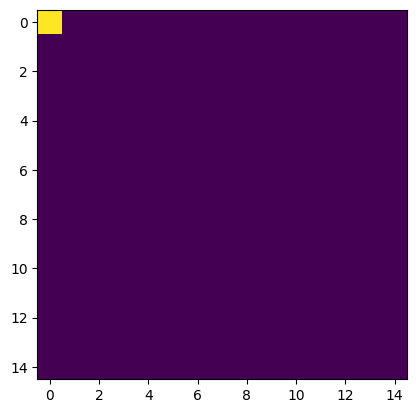

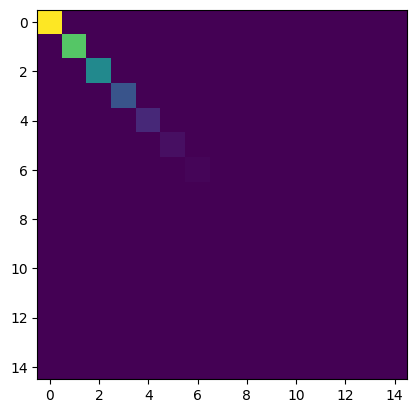

In [4]:
N = 15
dark_counts = 0.8
eta = 0.8

psi = create_perfect_bell_state(D=N, error_tolerance = 1e-10).to_dense()
# read_quantum_state(psi, N, num_states = 1)
dm = psi @ psi.conj().T

plt.figure()
plt.imshow(dm)

ops =  general_mixed_bs_noise_model(dark_counts, eta, N)
print(len(ops))

out = 0
for op in ops:
    out += op @ dm @ op.conj().T
plt.figure()
plt.imshow(out.real) 